![MLU Logo](../data/MLU_Logo.png)

# <a name="0">Machine Learning Accelerator - Tabular Data - Lecture 1</a>


## Final Project 

In this notebook, we build a ML model to predict the __Time at Center__ field of our final project dataset.

1. <a href="#1">Read the dataset</a> (Given) 
2. <a href="#2">Train a model</a> (Implement)
    * <a href="#21">Exploratory Data Analysis</a>
    * <a href="#22">Select features to build the model</a>
    * <a href="#23">Data processing</a>
    * <a href="#24">Model training</a>
3. <a href="#3">Make predictions on the test dataset</a> (Implement)
4. <a href="#4">Write the test predictions to a CSV file</a> (Given)

__Austin Animal Center Dataset__:

In this exercise, we are working with pet adoption data from __Austin Animal Center__. We have two datasets that cover intake and outcome of animals. Intake data is available from [here](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) and outcome is from [here](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238). 

In order to work with a single table, we joined the intake and outcome tables using the "Animal ID" column and created a training.csv, test_features.csv and y_test.csv files. Similar to our review dataset, we didn't consider animals with multiple entries to the facility to keep it simple. If you want to see the original datasets, they are available under data/review folder: Austin_Animal_Center_Intakes.csv, Austin_Animal_Center_Outcomes.csv.

__Dataset schema:__ 
- __Pet ID__ - Unique ID of pet
- __Outcome Type__ - State of pet at the time of recording the outcome
- __Sex upon Outcome__ - Sex of pet at outcome
- __Name__ - Name of pet 
- __Found Location__ - Found location of pet before entered the center
- __Intake Type__ - Circumstances bringing the pet to the center
- __Intake Condition__ - Health condition of pet when entered the center
- __Pet Type__ - Type of pet
- __Sex upon Intake__ - Sex of pet when entered the center
- __Breed__ - Breed of pet 
- __Color__ - Color of pet 
- __Age upon Intake Days__ - Age of pet when entered the center (days)
- __Time at Center__ - Time at center (0 = less than 30 days; 1 = more than 30 days). This is the value to predict. 


In [428]:
#%pip install -q -r ../requirements.txt

## 1. <a name="1">Read the datasets</a> (Given)
(<a href="#0">Go to top</a>)

Let's read the datasets into dataframes, using Pandas.

In [429]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
  
training_data = pd.read_csv('../data/final_project/training.csv')
test_data = pd.read_csv('../data/final_project/test_features.csv')

print('The shape of the training dataset is:', training_data.shape)
print('The shape of the test dataset is:', test_data.shape)


The shape of the training dataset is: (71538, 13)
The shape of the test dataset is: (23846, 12)


## 2. <a name="2">Train a model</a> (Implement)
(<a href="#0">Go to top</a>)

 * <a href="#21">Exploratory Data Analysis</a>
 * <a href="#22">Select features to build the model</a>
 * <a href="#23">Data processing</a>
 * <a href="#24">Model training</a>

### 2.1 <a name="21">Exploratory Data Analysis</a> 
(<a href="#2">Go to Train a model</a>)

We look at number of rows, columns and some simple statistics of the dataset.

In [430]:
#K Nearest Neighbors 
#training_data.info()
#training_data.describe()
#training_data.head()
print(test_data.info())

print("")
print(training_data.columns)

model_features = training_data.columns.drop('Outcome Type')
model_target = 'Outcome Type'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23846 entries, 0 to 23845
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Pet ID                23846 non-null  object
 1   Outcome Type          23846 non-null  object
 2   Sex upon Outcome      23846 non-null  object
 3   Name                  14733 non-null  object
 4   Found Location        23846 non-null  object
 5   Intake Type           23846 non-null  object
 6   Intake Condition      23846 non-null  object
 7   Pet Type              23846 non-null  object
 8   Sex upon Intake       23846 non-null  object
 9   Breed                 23846 non-null  object
 10  Color                 23846 non-null  object
 11  Age upon Intake Days  23846 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 2.2+ MB
None

Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', '

In [431]:
import numpy as np
numerical_features_all = training_data[model_features].select_dtypes(include=np.number).columns
print('Numerical columns:',numerical_features_all)

print('')

categorical_features_all = training_data[model_features].select_dtypes(include='object').columns
print('Categorical columns:',categorical_features_all)



Numerical columns: Index(['Age upon Intake Days', 'Time at Center'], dtype='object')

Categorical columns: Index(['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color'],
      dtype='object')


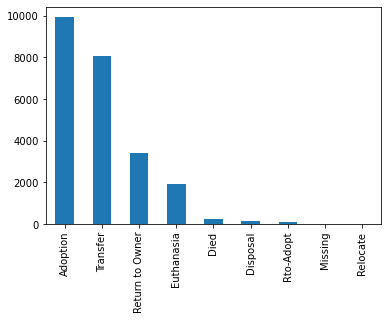

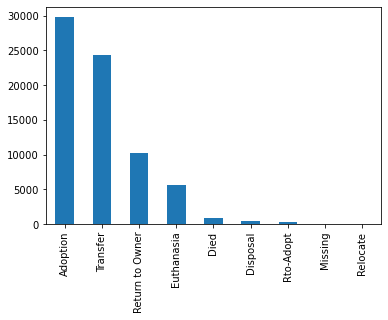

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days
0,A782657,Adoption,Spayed Female,NaN,1911 Dear Run Drive in Austin (TX),Stray,Normal,Dog,Intact Female,Labrador Retriever Mix,Black,60
1,A804622,Adoption,Neutered Male,NaN,702 Grand Canyon in Austin (TX),Stray,Normal,Dog,Intact Male,Boxer/Anatol Shepherd,Brown/Tricolor,60
2,A786693,Return to Owner,Neutered Male,Zeus,Austin (TX),Public Assist,Normal,Dog,Neutered Male,Australian Cattle Dog/Pit Bull,Black/White,3285
3,A693330,Adoption,Spayed Female,Hope,Levander Loop & Airport Blvd in Austin (TX),Stray,Normal,Dog,Intact Female,Miniature Poodle,Gray,1825
4,A812431,Adoption,Neutered Male,NaN,Austin (TX),Owner Surrender,Injured,Cat,Intact Male,Domestic Shorthair,Blue/White,210


In [432]:
import matplotlib.pyplot as plt
%matplotlib inline

test_data[model_target].value_counts().plot.bar()
plt.show()

training_data[model_target].value_counts().plot.bar()
plt.show()

training_data.head()
test_data.head()
#This seems to be a pretty unbalanced data set since the pool
#for adoption and transfer is much larger than the other outcomes
#how can I predict an outcome for 7 values in the test set
#that are not in the trianing set

### 2.2 <a name="22">Select features to build the model</a> 
(<a href="#2">Go to Train a model</a>)


Age upon Intake Days


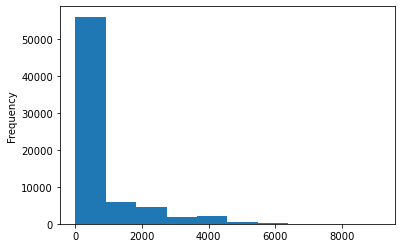

Time at Center


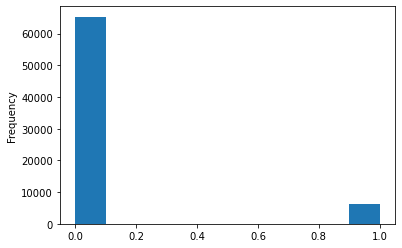

(-9.126, 912.5]     56111
(912.5, 1825.0]      7948
(1825.0, 2737.5]     2596
(2737.5, 3650.0]     2973
(3650.0, 4562.5]      954
(4562.5, 5475.0]      757
(5475.0, 6387.5]      135
(6387.5, 7300.0]       59
(7300.0, 8212.5]        3
(8212.5, 9125.0]        2
Name: Age upon Intake Days, dtype: int64

(-0.002, 0.1]    65314
(0.1, 0.2]           0
(0.2, 0.3]           0
(0.3, 0.4]           0
(0.4, 0.5]           0
(0.5, 0.6]           0
(0.6, 0.7]           0
(0.7, 0.8]           0
(0.8, 0.9]           0
(0.9, 1.0]        6224
Name: Time at Center, dtype: int64


In [433]:
for c in numerical_features_all:
    print(c)
    training_data[c].plot.hist(bins=10)
    plt.show()
#A few values on the very end might be outliers but mostly reasonable for age

print(training_data['Age upon Intake Days'].value_counts(bins=10, sort=False))

print("")
print(training_data[c].value_counts(bins=10, sort=False))
#the data in the higher age ranges probably are outliers
#I will cap the maximum age range at 3650 days since I suspect
#most pets that are that old would be treated the same





numerical_features = 'Age upon Intake Days'

### 2.3 <a name="23">Data Processing</a> 
(<a href="#2">Go to Train a model</a>)


In [434]:
#new_training_data = training_data[(training_data['Age upon Intake Days'] < 3651)]

print('Training set shape:', training_data.shape)

print('Class 0 samples in the training set:', sum(training_data[model_target] == 'Adoption'))
print('Class 1 samples in the training set:', sum(training_data[model_target] == 'Transfer'))
print('Class 2 samples in the training set:', sum(training_data[model_target] == 'Return to Owner'))
print('Class 3 samples in the training set:', sum(training_data[model_target] == 'Euthanasia'))
print('Class 4 samples in the training set:', sum(training_data[model_target] == 'Died'))
print('Class 5 samples in the training set:', sum(training_data[model_target] == 'Rto-adopt'))
print('Class 6 samples in the training set:', sum(training_data[model_target] == 'Missing'))
print('Class 7 samples in the training set:', sum(training_data[model_target] == 'Relocate'))

print("")
print("")

print('Class 0 samples in the test set:', sum(test_data[model_target] == 'Adoption'))
print('Class 1 samples in the test set:', sum(test_data[model_target] == 'Transfer'))
print('Class 2 samples in the test set:', sum(test_data[model_target] == 'Return to Owner'))
print('Class 3 samples in the test set:', sum(test_data[model_target] == 'Euthanasia'))
print('Class 4 samples in the test set:', sum(test_data[model_target] == 'Died'))
print('Class 5 samples in the test set:', sum(test_data[model_target] == 'Rto-adopt'))
print('Class 6 samples in the test set:', sum(test_data[model_target] == 'Missing'))
print('Class 7 samples in the test set:', sum(test_data[model_target] == 'Relocate'))

from sklearn.utils import shuffle

class_0_no = training_data[training_data[model_target] == 'Adoption']
class_1_no = training_data[training_data[model_target] == 'Transfer']
class_2_no = training_data[training_data[model_target] == 'Return to Owner']
class_3_no = training_data[training_data[model_target] == 'Euthanasia']
class_4_no = training_data[training_data[model_target] == 'Died']
#class_5_no = training_data[training_data[model_target] == 'Rto-adopt']
class_6_no = training_data[training_data[model_target] == 'Missing']
class_7_no = training_data[training_data[model_target] == 'Relocate']


upsampled_class_1_no = class_1_no.sample(n=len(class_0_no), replace=True, random_state=42)
upsampled_class_2_no = class_2_no.sample(n=len(class_0_no), replace=True, random_state=42)
upsampled_class_3_no = class_3_no.sample(n=len(class_0_no), replace=True, random_state=42)
upsampled_class_4_no = class_4_no.sample(n=len(class_0_no), replace=True, random_state=42)
#upsampled_class_5_no = class_5_no.sample(n=len(class_0_no), replace=True, random_state=42)
upsampled_class_6_no = class_6_no.sample(n=len(class_0_no), replace=True, random_state=42)
upsampled_class_7_no = class_7_no.sample(n=len(class_0_no), replace=True, random_state=42)

training_data = pd.concat([class_0_no, upsampled_class_1_no,upsampled_class_2_no,upsampled_class_3_no,upsampled_class_4_no,upsampled_class_6_no
                         ,upsampled_class_7_no])
training_data = shuffle(training_data)
#print("")
#print('Class 0 samples in the training set:', sum(training_data[model_target] == 'Transfer'))
#print('Class 1 samples in the training set:', sum(training_data[model_target] == 'Adoption'))
#print('Class 2 samples in the training set:', sum(training_data[model_target] == 'Return to Owner'))
#print('Class 3 samples in the training set:', sum(training_data[model_target] == 'Euthanasia'))
#print('Class 4 samples in the training set:', sum(training_data[model_target] == 'Died'))
#print('Class 6 samples in the training set:', sum(training_data[model_target] == 'Missing'))
#print('Class 7 samples in the training set:', sum(training_data[model_target] == 'Relocate'))


Training set shape: (71538, 13)
Class 0 samples in the training set: 29796
Class 1 samples in the training set: 24258
Class 2 samples in the training set: 10288
Class 3 samples in the training set: 5689
Class 4 samples in the training set: 806
Class 5 samples in the training set: 0
Class 6 samples in the training set: 37
Class 7 samples in the training set: 11


Class 0 samples in the test set: 9938
Class 1 samples in the test set: 8041
Class 2 samples in the test set: 3431
Class 3 samples in the test set: 1941
Class 4 samples in the test set: 247
Class 5 samples in the test set: 0
Class 6 samples in the test set: 15
Class 7 samples in the test set: 9


### 2.4 <a name="24">Model training</a> 
(<a href="#2">Go to Train a model</a>)


In [435]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

classifier = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('estimator', KNeighborsClassifier(n_neighbors = 200))
])


from sklearn import set_config
set_config(display='diagram')
classifier



X_train = training_data[numerical_features]
y_train = training_data[model_target]

X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test.values.reshape(-1,1))


## 3. <a name="3">Make predictions on the test dataset</a> (Implement)
(<a href="#0">Go to top</a>)

Use the test set to make predictions with the trained model.

In [436]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

X_test = test_data[numerical_features]
y_test = test_data[model_target]

test_predictions = classifier.predict(X_test.values.reshape(-1,1))

print('Model performance on the test set:')
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Test accuracy:", accuracy_score(y_test, test_predictions))

Model performance on the test set:
[[3799  212    0 2923  155  735 1570    0  544]
 [  43   29    0   64   14   33   35    0   29]
 [   5    1    0  101    1   12    9    0    1]
 [ 160   60    0 1119   10  142  407    0   43]
 [   3    0    0    3    0    5    3    0    1]
 [   0    0    0    5    0    3    0    0    1]
 [ 212   76    0 1236   35   45 1773    0   54]
 [   8    1    0   37    0    2   44    0    2]
 [1775  556    0 2474  213  493 1298    0 1232]]
                 precision    recall  f1-score   support

       Adoption       0.63      0.38      0.48      9938
           Died       0.03      0.12      0.05       247
       Disposal       0.00      0.00      0.00       130
     Euthanasia       0.14      0.58      0.23      1941
        Missing       0.00      0.00      0.00        15
       Relocate       0.00      0.33      0.00         9
Return to Owner       0.35      0.52      0.41      3431
      Rto-Adopt       0.00      0.00      0.00        94
       Transfer   